In [92]:
import pandas as pd # 引用套件並縮寫為 pd  
df_capterra = pd.read_csv('test.csv', encoding='utf_8_sig', index_col=0) 
df_capterra

C:\Users\lindy\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Review,Title,Overall,Pros,Cons,Switch,Switch_reason,Alter,Alter_reason
0,1,"“Most simple, reliable and efficient meeting ...",I would simply say that it has been the softwa...,"The simplicity and usability of the software, ...",Background noise management is not yet so good...,Google Meet and Microsoft Teams,Users will slow internet speeds had very horri...,Google Meet and Microsoft Teams,"Zoom is very simple to use, no need for sign u..."
1,2,“Zoom Meeting's review”,The implementation of this software has allowe...,"To begin, some of the features that are impact...","Talking about the subject, I consider that the...",NaN,NaN,Google Meet,I think that what convinced me the most to pur...
2,3,"“After the pandemic, everyone in the field kno...","It gets the job done, it has many features, an...",The free plan is pretty generous with up to 10...,I don't like the fact that software needs to b...,NaN,NaN,NaN,NaN
3,4,“Click and start!”,I have had a few techno-phobic clients and eve...,Most people have heard of it and been exposed ...,Moderators for big groups could perhaps be a b...,Google Meet,I chose this over google meet for a few reason...,Google Meet and Google Workspace,When using Google Meet I didn't realise it was...
4,5,“Zoom- Clear audio and HD Video Calling Featur...,"Zoom has the best video conferencing, online m...",Zoom is the clear choice for video conferencin...,No problem to use zoom for business meetings. ...,NaN,NaN,Google Hangouts,Zoom has advance feature to do business meetin...
...,...,...,...,...,...,...,...,...,...
995,996,“Great tool for keeping communication lines open”,The biggest problem that we have solved with i...,Zoom was incredibly easy to integrate into our...,The thing that I felt was lacking with Zoom is...,NaN,NaN,Google Meet,It was much easier to use.
996,997,“Best Virtual Conference Software for the Masses”,Overall zoom was really easy to deploy to our ...,Having used plenty of different software offer...,My issue with the zoom has been their security...,NaN,NaN,NaN,NaN
997,998,"“Easy to use, popular platform. Inexpensive.”",I would totally recommend this to small organi...,Ease of use. Anyone can use it and don't need ...,Logo design could be made more fancy.\nSometim...,NaN,NaN,NaN,NaN
998,999,“Zoom in 2020”,My overall experience has been great! Zoom has...,This software has definitely become more popul...,What I like least about Zoom is that it doesn'...,NaN,NaN,NaN,NaN


In [116]:
# Convert to list
doc_complete = df_capterra.Cons.values.tolist()
doc_complete[0]

C:\Users\lindy\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


"Background noise management is not yet so good though I assume that this is technically possible to achieve. Sometimes participant unmutes and attempts to speak with very high background noise hence causing unnecessary disrupting and distractions in the meeting. It would be awesome if there is a feature within the software to manage if a users' microphone background noise"

In [117]:
import gensim
from gensim.utils import simple_preprocess
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(doc_complete))
print(data_words[0])

['background', 'noise', 'management', 'is', 'not', 'yet', 'so', 'good', 'though', 'assume', 'that', 'this', 'is', 'technically', 'possible', 'to', 'achieve', 'sometimes', 'participant', 'unmutes', 'and', 'attempts', 'to', 'speak', 'with', 'very', 'high', 'background', 'noise', 'hence', 'causing', 'unnecessary', 'disrupting', 'and', 'distractions', 'in', 'the', 'meeting', 'it', 'would', 'be', 'awesome', 'if', 'there', 'is', 'feature', 'within', 'the', 'software', 'to', 'manage', 'if', 'users', 'microphone', 'background', 'noise']


C:\Users\lindy\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [118]:
from gensim.models.phrases import Phrases, ENGLISH_CONNECTOR_WORDS
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

C:\Users\lindy\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['background_noise', 'management', 'is', 'not', 'yet', 'so', 'good', 'though', 'assume', 'that', 'this', 'is', 'technically', 'possible', 'to', 'achieve', 'sometimes', 'participant', 'unmutes', 'and', 'attempts', 'to', 'speak', 'with', 'very', 'high', 'background_noise', 'hence', 'causing', 'unnecessary', 'disrupting', 'and', 'distractions', 'in', 'the', 'meeting', 'it', 'would', 'be', 'awesome', 'if', 'there', 'is', 'feature', 'within', 'the', 'software', 'to', 'manage', 'if', 'users', 'microphone', 'background_noise']


In [119]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['nan', 'subject', 're', 'edu', 'use'])

# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

C:\Users\lindy\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [120]:
import spacy
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_trigrams = make_trigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# !python -m spacy download en

nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_trigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[0])

C:\Users\lindy\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['background_noise', 'management', 'good', 'though', 'assume', 'technically', 'possible', 'achieve', 'sometimes', 'participant', 'unmute', 'attempt', 'speak', 'high', 'hence', 'cause', 'unnecessary', 'disrupt', 'distraction', 'meeting', 'awesome', 'feature', 'software', 'manage', 'user', 'microphone']


In [121]:
from gensim import corpora
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1)]]


C:\Users\lindy\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### LDA 法一

In [44]:
from gensim.models import CoherenceModel
# Build LDA model
import matplotlib.pyplot as plt
topics_num = []
Coherence_Score = []

for i in range(1,21):
    lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                               id2word=id2word,
                                               num_topics=i, 
                                               random_state=100,
                                               update_every=1,
                                               chunksize=100,
                                               passes=10,
                                               alpha='auto',
                                               per_word_topics=True)
    coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    topics_num.append(i)
    Coherence_Score.append(coherence_lda)

C:\Users\lindy\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\lindy\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


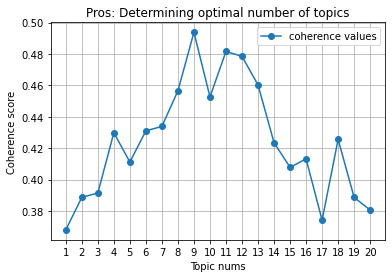

In [45]:
lines = plt.plot(topics_num, Coherence_Score)
plt.setp(lines, marker = "o") 
plt.grid(True)
plt.title("Pros: Determining optimal number of topics") 
plt.xlabel("Topic nums")
plt.ylabel("Coherence score")
plt.legend(["coherence values"], loc='best')
plt.xticks(topics_num)
plt.show()

In [122]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=9, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

C:\Users\lindy\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [123]:
from pprint import pprint
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.037*"upgrade" + 0.034*"concern" + 0.018*"expensive" + 0.018*"love" + '
  '0.016*"address" + 0.014*"email" + 0.014*"setup" + 0.014*"large" + '
  '0.013*"navigate" + 0.010*"ui"'),
 (1,
  '0.025*"like" + 0.023*"webinar" + 0.020*"dislike" + 0.019*"figure" + '
  '0.017*"simple" + 0.017*"complaint" + 0.015*"room" + 0.014*"quick" + '
  '0.013*"rather" + 0.011*"tend"'),
 (2,
  '0.031*"log" + 0.026*"sure" + 0.019*"security" + 0.018*"love" + '
  '0.018*"product" + 0.017*"month" + 0.013*"login" + 0.011*"resolve" + '
  '0.011*"technology" + 0.010*"similar"'),
 (3,
  '0.050*"zoom" + 0.031*"meeting" + 0.025*"feature" + 0.019*"time" + '
  '0.018*"video" + 0.017*"sometimes" + 0.017*"user" + 0.015*"people" + '
  '0.015*"use" + 0.015*"software"'),
 (4,
  '0.041*"certain" + 0.022*"adjust" + 0.020*"improvement" + 0.017*"type" + '
  '0.016*"kind" + 0.014*"consider" + 0.014*"definitely" + 0.013*"profit" + '
  '0.013*"market" + 0.012*"focus"'),
 (5,
  '0.055*"screen" + 0.043*"share" + 0.023*"chat" 

C:\Users\lindy\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [124]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

from gensim.models import CoherenceModel
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

C:\Users\lindy\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Perplexity:  -7.024795535998192

Coherence Score:  0.49380929982158467


In [109]:
import pyLDAvis
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
vis

C:\Users\lindy\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.400563  0.001822       1        1  83.834346
2     -0.073590 -0.231508       2        1   3.918381
0     -0.078598  0.123510       3        1   3.650684
6     -0.079823  0.089183       4        1   3.318032
1     -0.060998  0.003767       5        1   2.244988
5     -0.054218  0.005474       6        1   1.759875
4     -0.053336  0.007752       7        1   1.273694, topic_info=              Term         Freq        Total Category  logprob  loglift
114       business    95.000000    95.000000  Default  30.0000  30.0000
134          class    79.000000    79.000000  Default  29.0000  29.0000
43            zoom  1171.000000  1171.000000  Default  28.0000  28.0000
18         meeting  1057.000000  1057.000000  Default  27.0000  27.0000
823       training    33.000000    33.000000  Default  26.0000  26.0000
...            ...          ...          ...      ...      ...      ...
2427           sin     1.709050     2.420826   Topic7  -5.5095   4.0151
1854          feed     1.684806     2.397658   Topic7  -5.5238   4.0104
2201  participante     1.628411     2.340274   Topic7  -5.5579   4.0006
1630       respond     1.453354     2.167279   Topic7  -5.6716   3.9637
2478      disperse     1.422881     2.134840   Topic7  -5.6928   3.9575

[269 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
363       1  0.886734     account
363       3  0.115661     account
778       2  0.947980    activity
1587      2  0.909591  additional
102       7  0.622693     address
...     ...       ...         ...
131       1  0.998992        work
2098      7  0.881627   workforce
1346      6  0.888066       worry
153       3  0.904836     youtube
43        1  0.999660        zoom

[282 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 3, 1, 7, 2, 6, 5])

In [126]:
def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row[0], key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each review
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=doc_complete)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Cons_review_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

C:\Users\lindy\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Cons_review_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,3.0,0.5742,"zoom, meeting, feature, time, video, sometimes...",Background noise management is not yet so good...
1,1,7.0,0.5994,"version, free, meeting, minute, time, account,...","Talking about the subject, I consider that the..."
2,2,3.0,0.5896,"zoom, meeting, feature, time, video, sometimes...",I don't like the fact that software needs to b...
3,3,2.0,0.4066,"log, sure, security, love, product, month, log...",Moderators for big groups could perhaps be a b...
4,4,3.0,0.7139,"zoom, meeting, feature, time, video, sometimes...",No problem to use zoom for business meetings. ...
5,5,3.0,0.4479,"zoom, meeting, feature, time, video, sometimes...","Being the best in the market, the price is qui..."
6,6,3.0,0.3408,"zoom, meeting, feature, time, video, sometimes...","In its free version, the meeting session termi..."
7,7,7.0,0.4762,"version, free, meeting, minute, time, account,...",It do not have any cons as such in the paid ve...
8,8,7.0,0.5336,"version, free, meeting, minute, time, account,...",Zoom Meetings has few negatives as it mostly p...
9,9,3.0,0.6342,"zoom, meeting, feature, time, video, sometimes...",With all the features that have been added ove...


In [127]:
# Group top 5 sentences under each topic
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf_mallet

C:\Users\lindy\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,0.0,0.6566,"upgrade, concern, expensive, love, address, em...",Creo que es una aplicación que cumple lo que v...
1,1.0,0.4748,"like, webinar, dislike, figure, simple, compla...",Simpler coordination with viewpoint. At presen...
2,2.0,0.5378,"log, sure, security, love, product, month, log...",Les points négatifs seraient pour commencer la...
3,3.0,0.9282,"zoom, meeting, feature, time, video, sometimes...",My least favorite aspect is the Outlook plug-i...
4,4.0,0.5149,"certain, adjust, improvement, type, kind, cons...",Barra de herramientas no es muy intuitiva\nReu...
5,5.0,0.6510,"screen, share, chat, see, well, add, option, c...",I feel like the chat function could be upgrade...
6,6.0,0.5283,"internet, internet_connection, connection, ban...",The video quality is poor on poor internet con...
7,7.0,0.6154,"version, free, meeting, minute, time, account,...",There is a 30 minute time limit if you use the...
8,8.0,0.3410,"laptop, honestly, cut, strong, resource, proba...","While the software runs well on desktops, my S..."


In [128]:
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)
# topic_contribution = topic_contribution.rename_axis('Dominant_Topic').reset_index(name='percentage')

# Topic Number and Keywords
topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Topic_Keywords']].drop_duplicates()
topic_num_keywords.index = range(len(topic_num_keywords))

# Concatenate Column wise
df_dominant_topics = pd.concat([topic_num_keywords, topic_contribution, topic_counts], axis=1)
df_dominant_topics.columns = ['Dominant_Topic', 'Topic_Keywords', 'Perc_eviews', 'Num_Reviews']
df_dominant_topics.sort_values(by=['Dominant_Topic'])

C:\Users\lindy\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Dominant_Topic,Topic_Keywords,Perc_eviews,Num_Reviews
8.0,0.0,"upgrade, concern, expensive, love, address, em...",0.004,4
6.0,1.0,"like, webinar, dislike, figure, simple, compla...",0.004,4
2.0,2.0,"log, sure, security, love, product, month, log...",0.014,14
0.0,3.0,"zoom, meeting, feature, time, video, sometimes...",0.003,3
4.0,4.0,"certain, adjust, improvement, type, kind, cons...",0.004,4
3.0,5.0,"screen, share, chat, see, well, add, option, c...",0.851,851
5.0,6.0,"internet, internet_connection, connection, ban...",0.063,63
1.0,7.0,"version, free, meeting, minute, time, account,...",0.006,6
7.0,8.0,"laptop, honestly, cut, strong, resource, proba...",0.051,51


### LDA 法二

In [129]:
from gensim.models import LdaMulticore
# Build LDA model
import matplotlib.pyplot as plt
topics_num = []
Coherence_Score = []

for i in range(1,21):
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                            id2word=id2word,
                                            num_topics=i, 
                                            random_state=100,
                                            chunksize=100,
                                            passes=10,
                                            per_word_topics=True)
    coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    topics_num.append(i)
    Coherence_Score.append(coherence_lda)

C:\Users\lindy\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\lindy\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


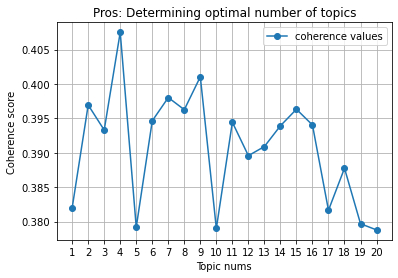

In [34]:
lines = plt.plot(topics_num, Coherence_Score)
plt.setp(lines, marker = "o") 
plt.grid(True)
plt.title("Pros: Determining optimal number of topics") 
plt.xlabel("Topic nums")
plt.ylabel("Coherence score")
plt.legend(["coherence values"], loc='best')
plt.xticks(topics_num)
plt.show()

In [93]:
# supporting function
def compute_coherence_values(corpus, dictionary, k, a, b):
    
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=k, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=a,
                                           eta=b)
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
    
    return coherence_model_lda.get_coherence()

C:\Users\lindy\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [95]:
import numpy as np
import tqdm
grid = {}
grid['Validation_Set'] = {}
# Topics range
min_topics = 2
max_topics = 11
step_size = 1
topics_range = range(min_topics, max_topics, step_size)
# Alpha parameter
alpha = list(np.arange(0.01, 1, 0.3))
alpha.append('symmetric')
alpha.append('asymmetric')
# Beta parameter
beta = list(np.arange(0.01, 1, 0.3))
beta.append('symmetric')
# Validation sets
num_of_docs = len(corpus)
corpus_sets = [# gensim.utils.ClippedCorpus(corpus, num_of_docs*0.25), 
               # gensim.utils.ClippedCorpus(corpus, num_of_docs*0.5), 
               gensim.utils.ClippedCorpus(corpus, int(num_of_docs*0.75)), 
               corpus]
corpus_title = ['75% Corpus', '100% Corpus']
model_results = {'Validation_Set': [],
                 'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []
                }
# Can take a long time to run
if 1 == 1:
    pbar = tqdm.tqdm(total=540)
    
    # iterate through validation corpuses
    for i in range(len(corpus_sets)):
        # iterate through number of topics
        for k in topics_range:
            # iterate through alpha values
            for a in alpha:
                # iterare through beta values
                for b in beta:
                    # get the coherence score for the given parameters
                    cv = compute_coherence_values(corpus=corpus_sets[i], dictionary=id2word, 
                                                  k=k, a=a, b=b)
                    # Save the model results
                    model_results['Validation_Set'].append(corpus_title[i])
                    model_results['Topics'].append(k)
                    model_results['Alpha'].append(a)
                    model_results['Beta'].append(b)
                    model_results['Coherence'].append(cv)
                    
                    pbar.update(1)
    pd.DataFrame(model_results).to_csv('lda_tuning_results.csv', index=False)
    pbar.close()

C:\Users\lindy\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)

  0%|                                                                                          | 0/540 [30:25<?, ?it/s]

 24%|██████████████████▍                                                           | 128/540 [30:52<1:40:52, 14.69s/it]


 48%|████████████████████████████████████▌                                       | 260/540 [1:01:52<1:05:27, 14.03s/it]


 73%|████████████████████████████████████████████████████████▌                     | 392/540 [1:33:48<35:07, 14.24s/it]


 97%|███████████████████████████████████████████████████████████████████████████▋  | 524/540 [2:06:20<03:59, 14.98s/it]


100%|██████████████████████████████████████████████████████████████████████████████| 540/540 [2:10:13<00:00, 14.47s/it]


In [35]:
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=9, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=0.91,
                                           eta=0.91)

C:\Users\lindy\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [36]:
from pprint import pprint
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.004*"zoom" + 0.004*"host" + 0.003*"easy" + 0.003*"meeting" + '
  '0.003*"group" + 0.003*"feature" + 0.003*"use" + 0.002*"reaction" + '
  '0.002*"allow" + 0.002*"chat"'),
 (1,
  '0.004*"zoom" + 0.003*"easy" + 0.002*"meeting" + 0.001*"video" + 0.001*"use" '
  '+ 0.001*"feature" + 0.001*"work" + 0.001*"software" + 0.001*"user" + '
  '0.001*"great"'),
 (2,
  '0.008*"student" + 0.006*"zoom" + 0.006*"teacher" + 0.004*"class" + '
  '0.004*"software" + 0.003*"face" + 0.003*"teach" + 0.003*"learn" + '
  '0.002*"use" + 0.002*"school"'),
 (3,
  '0.036*"zoom" + 0.034*"meeting" + 0.020*"easy" + 0.017*"feature" + '
  '0.016*"video" + 0.013*"screen" + 0.012*"share" + 0.011*"also" + '
  '0.011*"software" + 0.011*"use"'),
 (4,
  '0.003*"zoom" + 0.003*"easy" + 0.002*"meeting" + 0.001*"video" + '
  '0.001*"feature" + 0.001*"software" + 0.001*"work" + 0.001*"great" + '
  '0.001*"use" + 0.001*"screen"'),
 (5,
  '0.004*"meeting" + 0.003*"zoom" + 0.003*"easy" + 0.002*"keep" + '
  '0.002*"opportunit

C:\Users\lindy\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [37]:
from gensim.models import CoherenceModel
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

C:\Users\lindy\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Coherence Score:  0.36378294852872695


In [114]:
# !pip install pyLDAvis
import pyLDAvis
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
vis

C:\Users\lindy\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.183433  0.000548       1        1  71.340992
8     -0.008453 -0.013816       2        1   5.298651
2      0.013261  0.016711       3        1   4.206442
0      0.011204  0.002529       4        1   3.436912
5      0.031109 -0.001798       5        1   3.398365
6      0.018849  0.002244       6        1   3.342570
7      0.041380 -0.002129       7        1   3.055659
1      0.035391 -0.001912       8        1   2.963721
4      0.040692 -0.002378       9        1   2.956688, topic_info=         Term        Freq       Total Category  logprob  loglift
43       zoom  905.000000  905.000000  Default  30.0000  30.0000
421   student   63.000000   63.000000  Default  29.0000  29.0000
125      host  101.000000  101.000000  Default  28.0000  28.0000
5        easy  509.000000  509.000000  Default  27.0000  27.0000
33   software  277.000000  277.000000  Default  26.0000  26.0000
..        ...         ...         ...      ...      ...      ...
99       time    0.705888  181.507761   Topic9  -7.2359  -2.0285
57        get    0.659232  104.938645   Topic9  -7.3043  -1.5490
411      need    0.674715  137.151131   Topic9  -7.2811  -1.7934
186      even    0.660484  147.856703   Topic9  -7.3024  -1.8899
2        chat    0.659307  176.704901   Topic9  -7.3042  -2.0699

[597 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
233       1  0.945155  able
233       2  0.008833  able
233       3  0.008833  able
233       4  0.008833  able
233       5  0.008833  able
...     ...       ...   ...
43        5  0.004415  zoom
43        6  0.007727  zoom
43        7  0.003311  zoom
43        8  0.004415  zoom
43        9  0.003311  zoom

[1249 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 9, 3, 1, 6, 7, 8, 2, 5])